Exploratory Data Analysis (EDA)

---

Introduction

The journey of any data-driven project begins with a thorough Exploratory Data Analysis (EDA). EDA is the compass that guides us, revealing patterns, anomalies, and relationships that are otherwise hidden within the raw data. In this project, EDA is particularly crucial as it provides the foundation for understanding the logistical complexities embedded in our dataset.

In this stage, we will delve into univariate and bivariate analyses, inspecting individual features such as Distance Traveled, Fuel Costs, and Driver Ratings to understand their distributions and potential outliers. We will also examine correlations between key variables and visualize their relationships. A special focus will be given to clustering techniques like K-Means, DBSCAN, and hierarchical clustering, which help identify natural groupings within the data. The goal here is to uncover hidden patterns that may impact cost and efficiency, such as route types, traffic conditions, and driver experience.

---

Conclusion

Upon completion of the EDA, we achieved a comprehensive understanding of the data's structure and relationships. Univariate analyses revealed the underlying distribution of critical features, providing insights into factors such as the average distance traveled and typical fuel costs. Bivariate and multivariate analyses further uncovered intricate relationships, particularly between Driver Consistency and Customer Satisfaction, highlighting areas where efficiency and satisfaction intersect. Our clustering analyses suggested potential driver and route segments, paving the way for targeted optimizations in later stages. Armed with these insights, we are ready to move forward with feature engineering, where we'll transform these raw insights into meaningful predictors.

In [210]:
# Import necessary libraries
import pandas as pd
import numpy as np
import sys
import os

# Ensure 'scripts' is in the same parent directory as 'notebooks'
sys.path.append(os.path.abspath("../scripts"))
logistics_df = pd.read_csv('../data/raw/logistics_df.csv')

In [211]:
from utils import plot_numeric_correlation_heatmap, load_cleaned_data, save_data, save_model, plot_distribution, plot_correlation_heatmap, check_missing_values, ensure_dir
from modeling import train_model, evaluate_model
from sklearn.model_selection import train_test_split

In [212]:
# Display basic info and initial rows
logistics_df.info()
logistics_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Route ID                       10000 non-null  object 
 1   Driver ID                      10000 non-null  object 
 2   Manifest                       10000 non-null  int64  
 3   Delivery Duration (hours)      10000 non-null  float64
 4   Date                           10000 non-null  object 
 5   Fuel Price per Gallon (USD)    10000 non-null  float64
 6   Actual Distance (miles)        10000 non-null  float64
 7   Planned Distance (miles)       10000 non-null  float64
 8   Weather Conditions             10000 non-null  object 
 9   Traffic Conditions             10000 non-null  object 
 10  Driver Ratings                 10000 non-null  float64
 11  Customer Satisfaction          10000 non-null  object 
 12  Delays (hours)                 10000 non-null  

Route ID Driver ID  Manifest  Delivery Duration (hours)        Date  \
0  MIA/BNA    BC7706   3815805                       6.25  2023-02-28   
1  PHX/MCO    ZN7236   7299049                       5.67  2023-10-29   
2  MCO/MIA    AW5182   9497986                       1.31  2023-09-14   
3  MIA/DCA    XY7077   7232797                       2.38  2023-12-31   
4  LAS/SAN    HJ7731   2201569                       1.24  2023-05-02   

   Fuel Price per Gallon (USD)  Actual Distance (miles)  \
0                          4.0                  1690.79   
1                          3.5                  2693.86   
2                          4.0                   925.07   
3                          4.5                   660.51   
4                          4.5                  1135.09   

   Planned Distance (miles) Weather Conditions Traffic Conditions  ...  \
0                    862.13               Snow           Moderate  ...   
1                   1970.77         Heavy Rain           Moderate  ...   
2                   1337.27         Heavy Rain              Heavy  ...   
3                   1833.61         Heavy Rain           Moderate  ...   
4                    428.03               Snow              Light  ...   

   Toll Costs (USD) Parking Costs (USD)  Time Idling (hours)  \
0             14.42               21.00                 0.46   
1             39.82                7.16                 1.65   
2             24.93               10.30                 0.83   
3             22.28                8.18                 0.68   
4             37.74               12.98                 0.67   

   Miles per Gallon  Calculated Fuel Cost (USD) Idle Cost (USD)  \
0              7.03                      962.65            0.93   
1              7.48                     1259.91            2.89   
2              7.76                      476.54            1.66   
3              6.83                      435.50            1.53   
4              7.84                      651.60            1.50   

   Fuel Cost Per Mile Total Operational Cost (USD) Weather Severity  \
0                0.57                      1659.22                2   
1                0.47                      2237.47                2   
2                0.52                      1883.15                2   
3                0.66                      2538.15                1   
4                0.57                      2169.99                1   

  Weather Severity Score  
0                      2  
1                      2  
2                      2  
3                      1  
4                      1  

[5 rows x 34 columns]

---

# Data Tidying

---

In [213]:
# # Make sure correct data is loaded
# logistics_df = pd.read_csv('../data/raw/logistics_df.csv')

# # Rounding specified columns to 4 decimal places
# columns_to_round = ["Distance Traveled (miles)", "Estimated Distance (miles)", "Fuel Costs (USD)"]
# logistics_df[columns_to_round] = logistics_df[columns_to_round].round(4)

# # Setting Distance Difference to non-negative values
# logistics_df["Distance Difference (miles)"] = logistics_df["Distance Difference (miles)"].clip(lower=0)

# # Handling missing values in Weather Severity columns
# logistics_df["Weather Severity"].fillna("N/A", inplace=True)
# logistics_df["Weather Severity Score"].fillna(0, inplace=True)

# # Stripping whitespace in text columns
# logistics_df = logistics_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# # Display the cleaned data
# logistics_df.head()

In [214]:
# Display summary statistics for numerical features
logistics_df.describe()

Manifest  Delivery Duration (hours)  Fuel Price per Gallon (USD)  \
count  1.000000e+04               10000.000000                 10000.000000   
mean   5.471580e+06                   5.527436                     4.000600   
std    2.590577e+06                   2.609292                     0.408187   
min    1.000070e+06                   1.000000                     3.500000   
25%    3.257352e+06                   3.280000                     3.500000   
50%    5.452154e+06                   5.490000                     4.000000   
75%    7.742642e+06                   7.810000                     4.500000   
max    9.999532e+06                  10.000000                     4.500000   

       Actual Distance (miles)  Planned Distance (miles)  Driver Ratings  \
count             10000.000000              10000.000000    10000.000000   
mean               1552.559811               1549.059438        3.005299   
std                 830.756679                836.340831        1.155328   
min                 100.360000                100.010000        1.000000   
25%                 834.732500                823.872500        1.997500   
50%                1561.645000               1553.675000        3.010000   
75%                2263.182500               2275.597500        3.992500   
max                2999.860000               2999.950000        5.000000   

       Delays (hours)  Warehouse Storage Costs (USD)  \
count    10000.000000                   10000.000000   
mean         2.491638                     124.034196   
std          1.444539                      43.178401   
min          0.000000                      50.020000   
25%          1.240000                      86.750000   
50%          2.480000                     123.575000   
75%          3.740000                     161.467500   
max          5.000000                     199.980000   

       Truck Maintenance Costs (USD)  Load Weight (tons)  ...  \
count                   10000.000000        10000.000000  ...   
mean                     1252.656203           10.301660  ...   
std                       430.197513            5.643938  ...   
min                       500.190000            0.500000  ...   
25%                       884.655000            5.360000  ...   
50%                      1251.475000           10.335000  ...   
75%                      1628.752500           15.230000  ...   
max                      1999.900000           20.000000  ...   

       Toll Costs (USD)  Parking Costs (USD)  Time Idling (hours)  \
count      10000.000000         10000.000000         10000.000000   
mean          24.865894            15.035085             1.001552   
std           14.518460             8.701769             0.576068   
min            0.010000             0.000000             0.000000   
25%           12.290000             7.340000             0.510000   
50%           24.890000            15.010000             1.000000   
75%           37.360000            22.650000             1.500000   
max           50.000000            30.000000             2.000000   

       Miles per Gallon  Calculated Fuel Cost (USD)  Idle Cost (USD)  \
count      10000.000000                10000.000000     10000.000000   
mean           6.995412                  894.602351         2.005892   
std            0.579466                  496.886522         1.178356   
min            6.000000                   45.940000         0.000000   
25%            6.490000                  474.900000         1.000000   
50%            6.990000                  887.290000         1.990000   
75%            7.500000                 1285.835000         2.980000   
max            8.000000                 2238.490000         4.500000   

       Fuel Cost Per Mile  Total Operational Cost (USD)  Weather Severity  \
count        10000.000000                  10000.000000      10000.000000   
mean             0.575783                   2313.199626          1.492700   
std              0.07

In [215]:
df = logistics_df

In [216]:
# Check for missing values
missing_values = logistics_df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

<Figure size 1000x600 with 0 Axes>

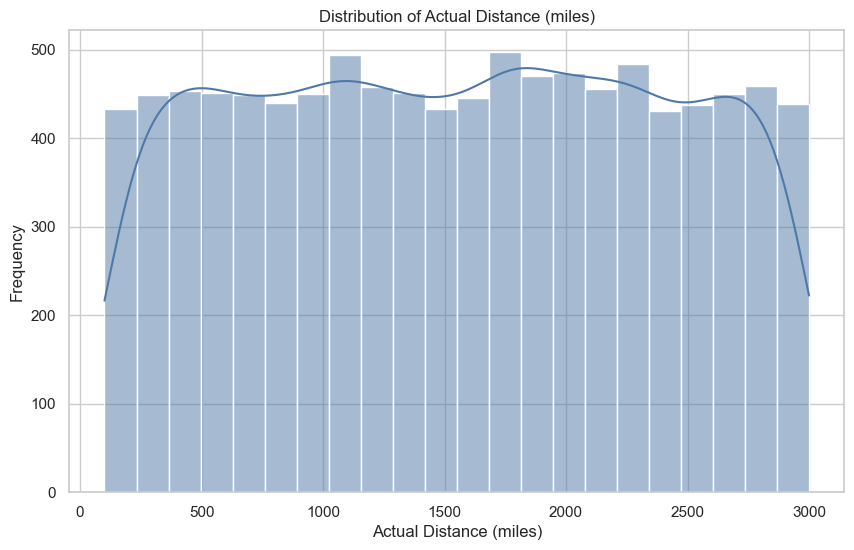

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional style
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(10, 6))

# Univariate Analysis: Histogram
def plot_histogram(column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, color="#4e79a7")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

plot_histogram('Actual Distance (miles)')

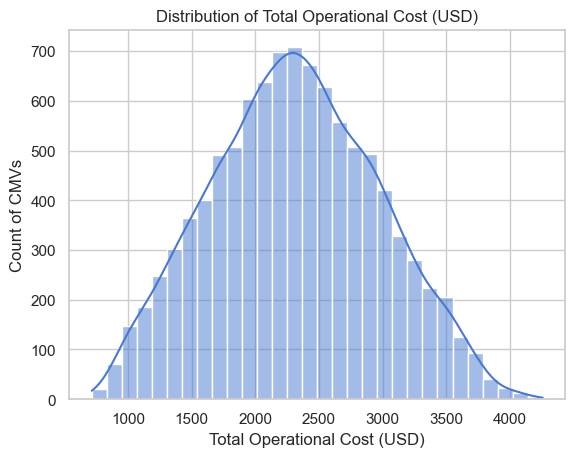

In [218]:
# Plot distribution of Total Operational Cost
sns.histplot(logistics_df['Total Operational Cost (USD)'], bins=30, kde=True)
plt.title("Distribution of Total Operational Cost (USD)")
plt.ylabel("Count of CMVs")
plt.savefig("../results/figures/distance_traveled_histogram.png", dpi=300, bbox_inches="tight")
plt.show()

Histogram

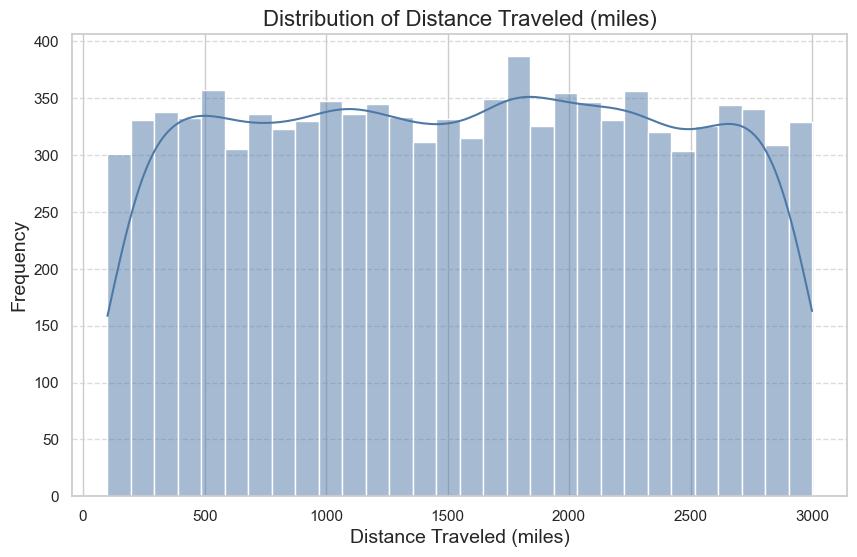

In [219]:
# Basic univariate visualization.

plt.figure(figsize=(10, 6))
sns.histplot(df['Actual Distance (miles)'], bins=30, kde=True, color="#4e79a7")
plt.title("Distribution of Distance Traveled (miles)", fontsize=16)
plt.xlabel("Distance Traveled (miles)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Box Plot

Purpose: Identifies the distribution and outliers of a variable.

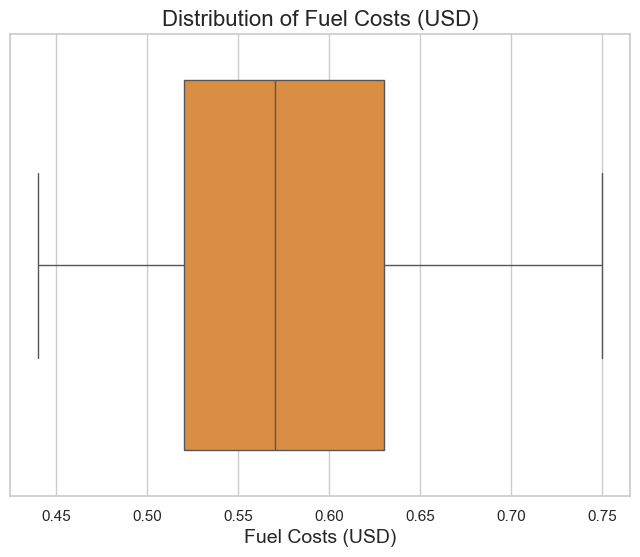

In [220]:

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Fuel Cost Per Mile'], color="#f28e2b")
plt.title("Distribution of Fuel Costs (USD)", fontsize=16)
plt.xlabel("Fuel Costs (USD)", fontsize=14)
plt.show()

KDE Plot

Purpose: Shows the probability density of a continuous variable.


/var/folders/s_/bdr4_2yj4_z0cz37bq2yrzxh0000gn/T/ipykernel_40700/2532340163.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Delivery Duration (hours)'], shade=True, color="#76b7b2")


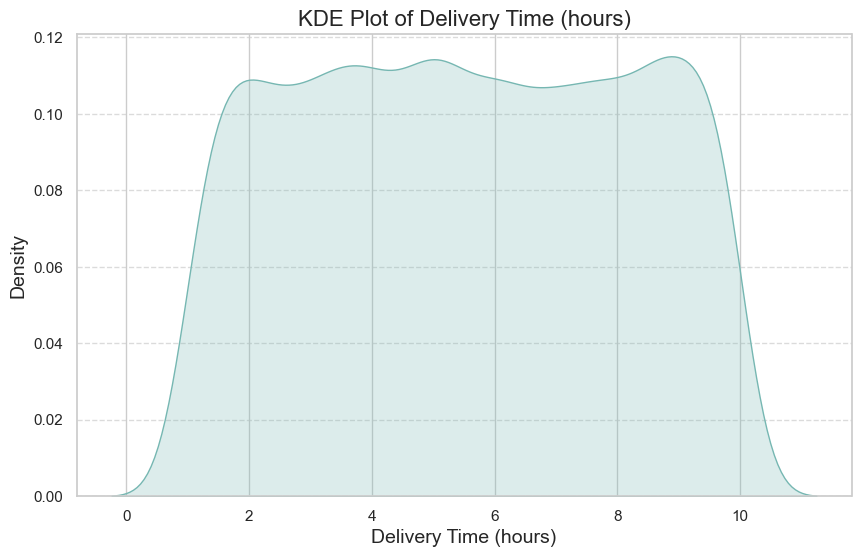

In [221]:

plt.figure(figsize=(10, 6))
sns.kdeplot(df['Delivery Duration (hours)'], shade=True, color="#76b7b2")
plt.title("KDE Plot of Delivery Time (hours)", fontsize=16)
plt.xlabel("Delivery Time (hours)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Bar Chart

Purpose: Useful for categorical data to show frequency counts.

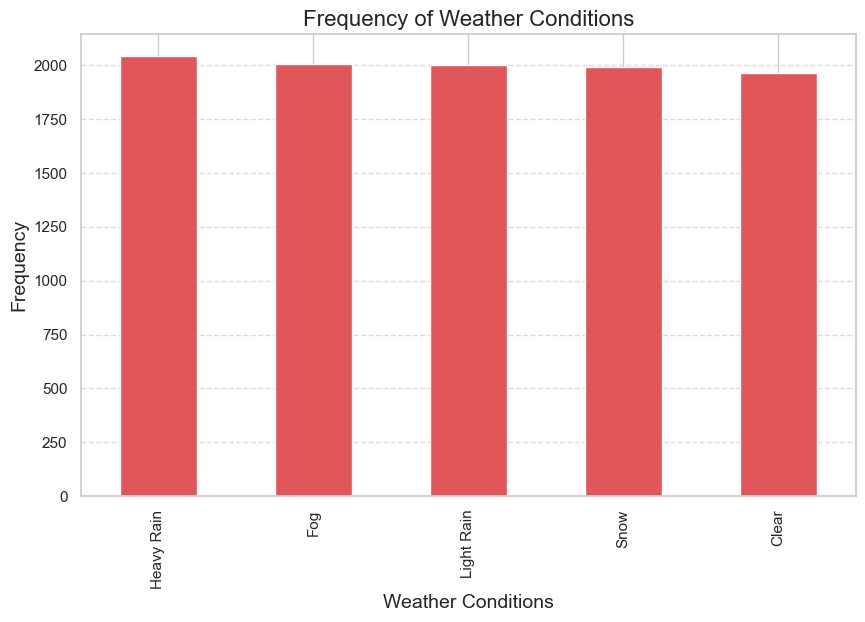

In [222]:

plt.figure(figsize=(10, 6))
df['Weather Conditions'].value_counts().plot(kind='bar', color="#e15759")
plt.title("Frequency of Weather Conditions", fontsize=16)
plt.xlabel("Weather Conditions", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

---

## Bivariate & Multivariate Visualizations (Examining Relationships)

---

Scatter Plot

Purpose: Shows the relationship between two continuous variables.

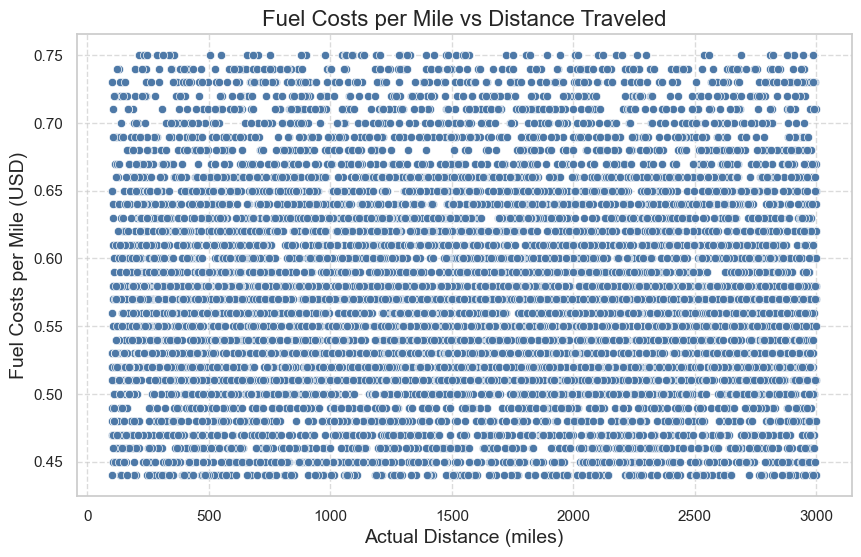

In [223]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Distance (miles)', y='Fuel Cost Per Mile', data=df, color="#4e79a7")
plt.title("Fuel Costs per Mile vs Distance Traveled", fontsize=16)
plt.xlabel("Actual Distance (miles)", fontsize=14)
plt.ylabel("Fuel Costs per Mile (USD)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Pair Plot

Purpose: Matrix of scatter plots to examine relationships between multiple variables.

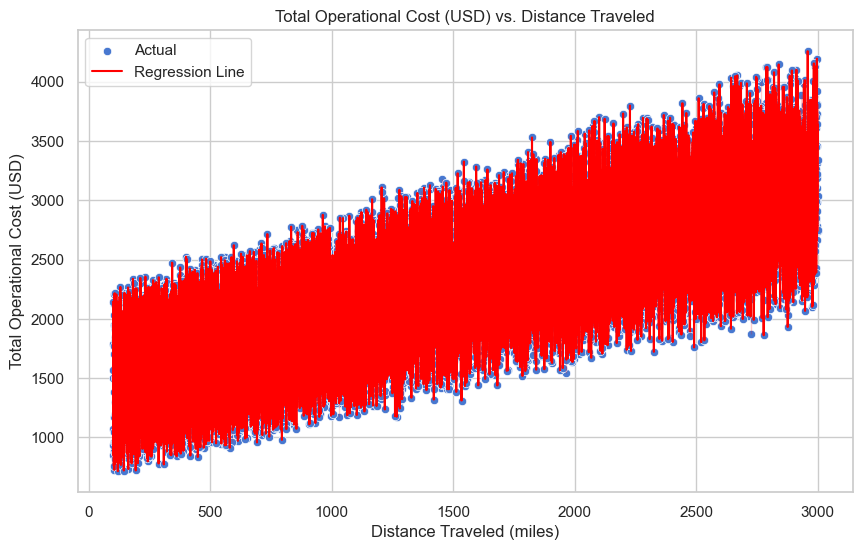

In [224]:
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Linear regression for Fuel Costs vs. Distance Traveled
X = logistics_df[['Actual Distance (miles)']]
y = logistics_df['Total Operational Cost (USD)']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)
logistics_df['Predicted Total Operational Cost (USD)'] = model.predict(X)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Actual Distance (miles)'], y=df['Total Operational Cost (USD)'], data=df, label="Actual")
sns.lineplot(x=df['Actual Distance (miles)'], y=df['Total Operational Cost (USD)'], color="red", label="Regression Line")
plt.xlabel("Distance Traveled (miles)")
plt.ylabel("Total Operational Cost (USD)")
plt.title("Total Operational Cost (USD) vs. Distance Traveled")
plt.legend()
plt.show()

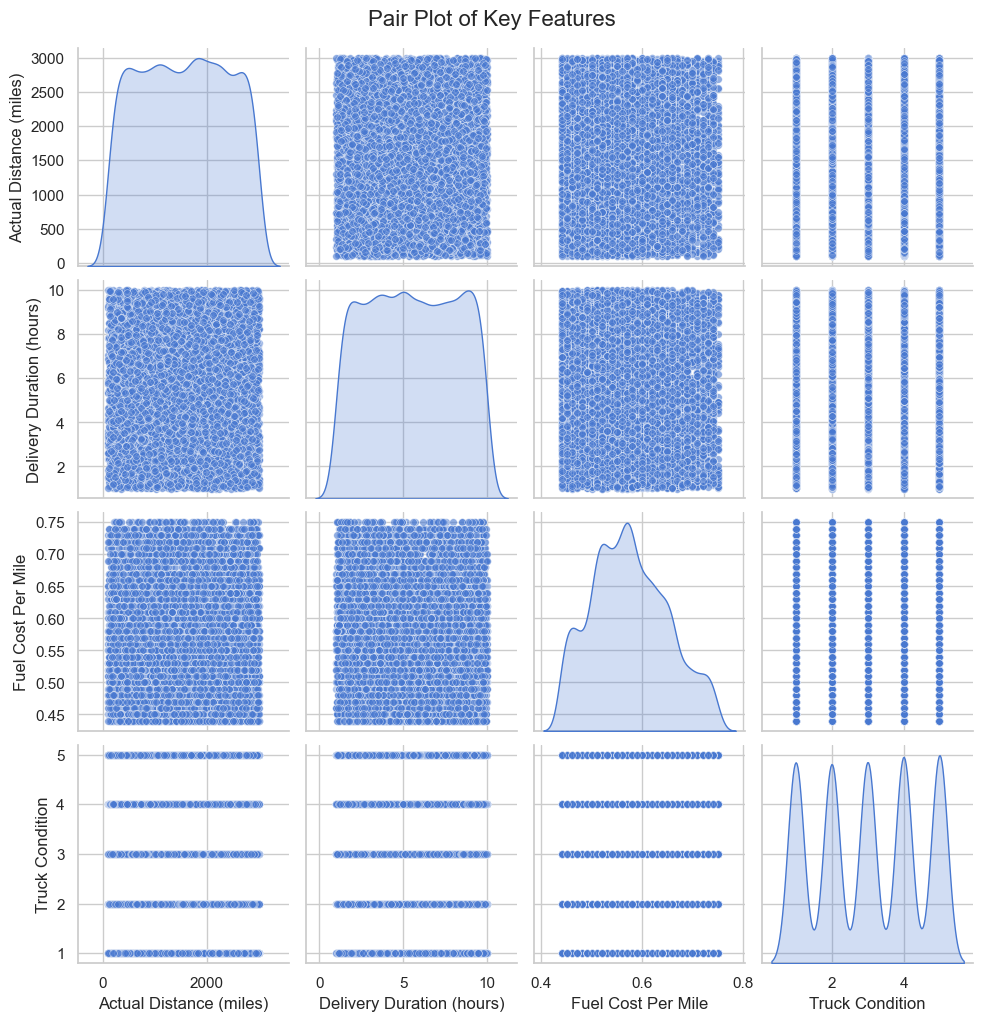

In [225]:

sns.pairplot(df[['Actual Distance (miles)', 'Delivery Duration (hours)', 'Fuel Cost Per Mile', 'Truck Condition']], 
             diag_kind='kde', plot_kws={'alpha':0.6, 's':30}, height=2.5)
plt.suptitle("Pair Plot of Key Features", y=1.02, fontsize=16)
plt.show()

In [226]:
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

# Copy DataFrame to work with encoding
encoded_df = logistics_df.copy()

# Drop columns that don't contribute to correlation analysis
encoded_df = logistics_df.drop(columns=['Route ID', 'Driver ID', 'Date', 'Delivery Start Time'], errors='ignore')

# Ordinal Encoding for ordered categories
ordinal_encoder = OrdinalEncoder(categories=[['Junior', 'Intermediate', 'Senior']])
encoded_df['Driver Experience'] = ordinal_encoder.fit_transform(encoded_df[['Driver Experience']])

# One-Hot Encoding for nominal categories
encoded_df = pd.get_dummies(encoded_df, columns=['Traffic Conditions', 'Weather Conditions', 
                                                 'Route Type', 'Truck Type', 'Load Type', 
                                                 'Delivery Window', 'Customer Satisfaction',
                                                 'Fuel Type'], 
                            drop_first=True)  # Drop first level to avoid multicollinearity


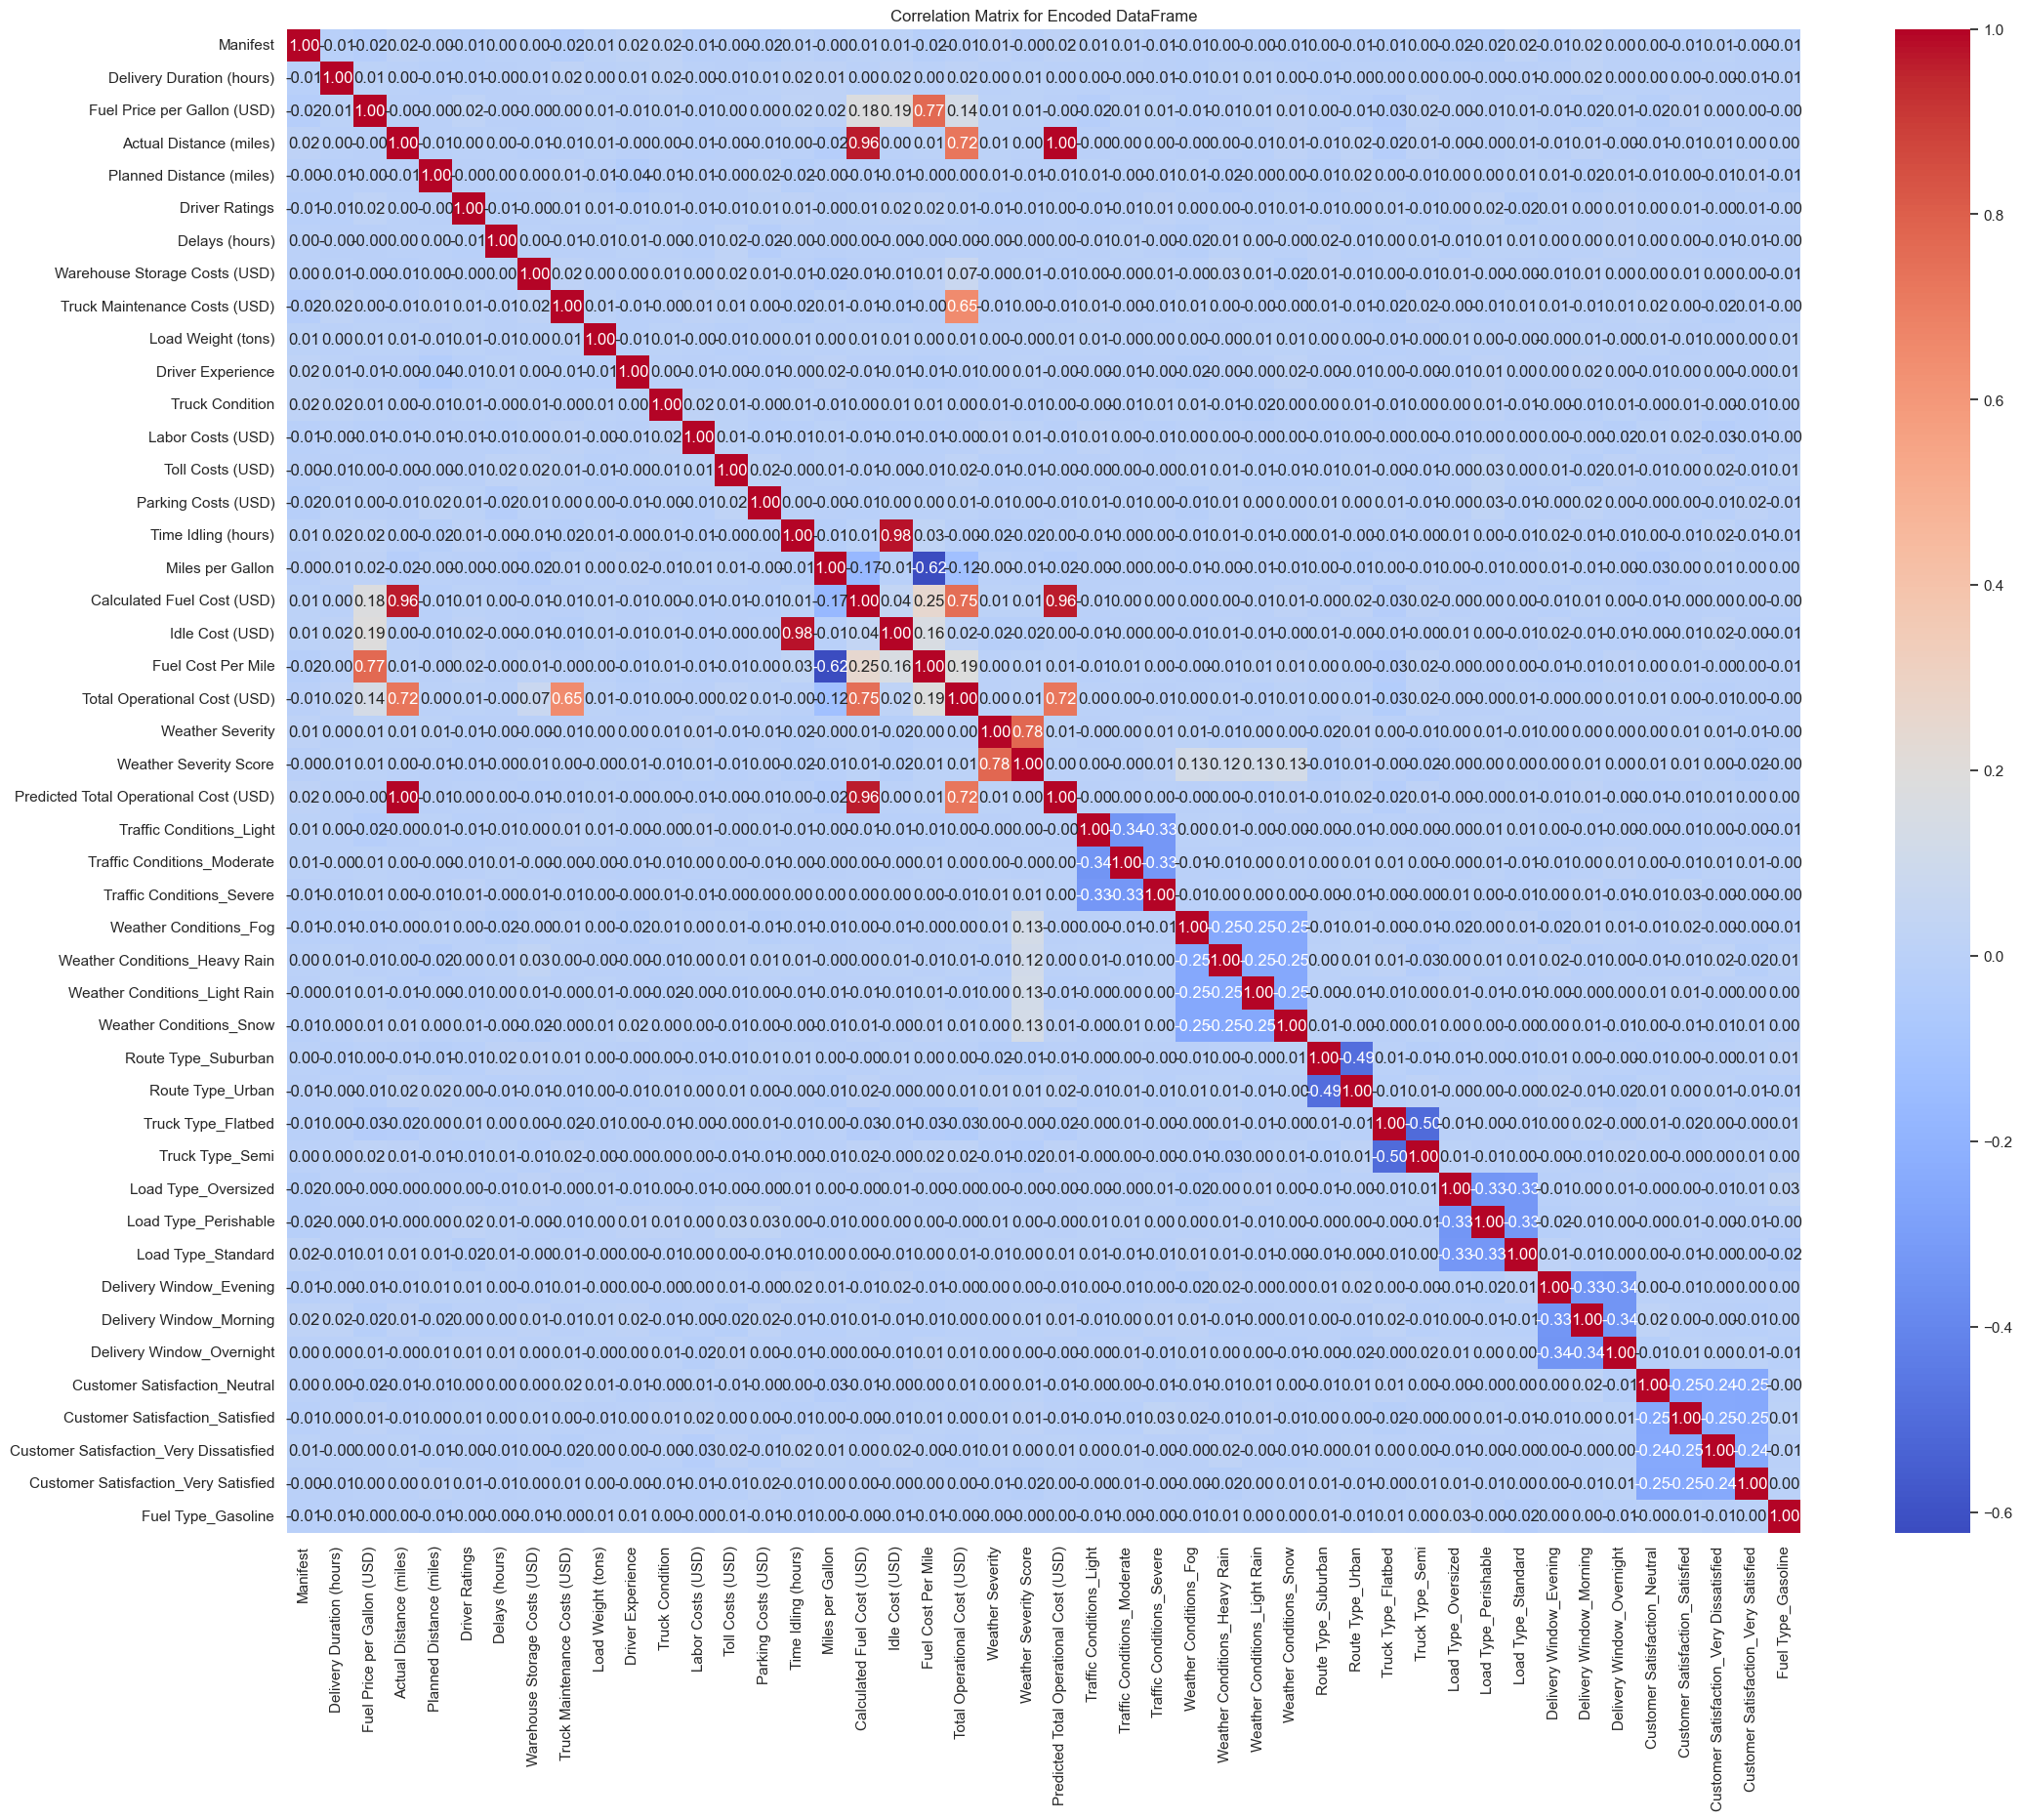

In [227]:
# Calculate the correlation matrix
corr_matrix = encoded_df.corr()

# Plot the heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Encoded DataFrame")
plt.show()


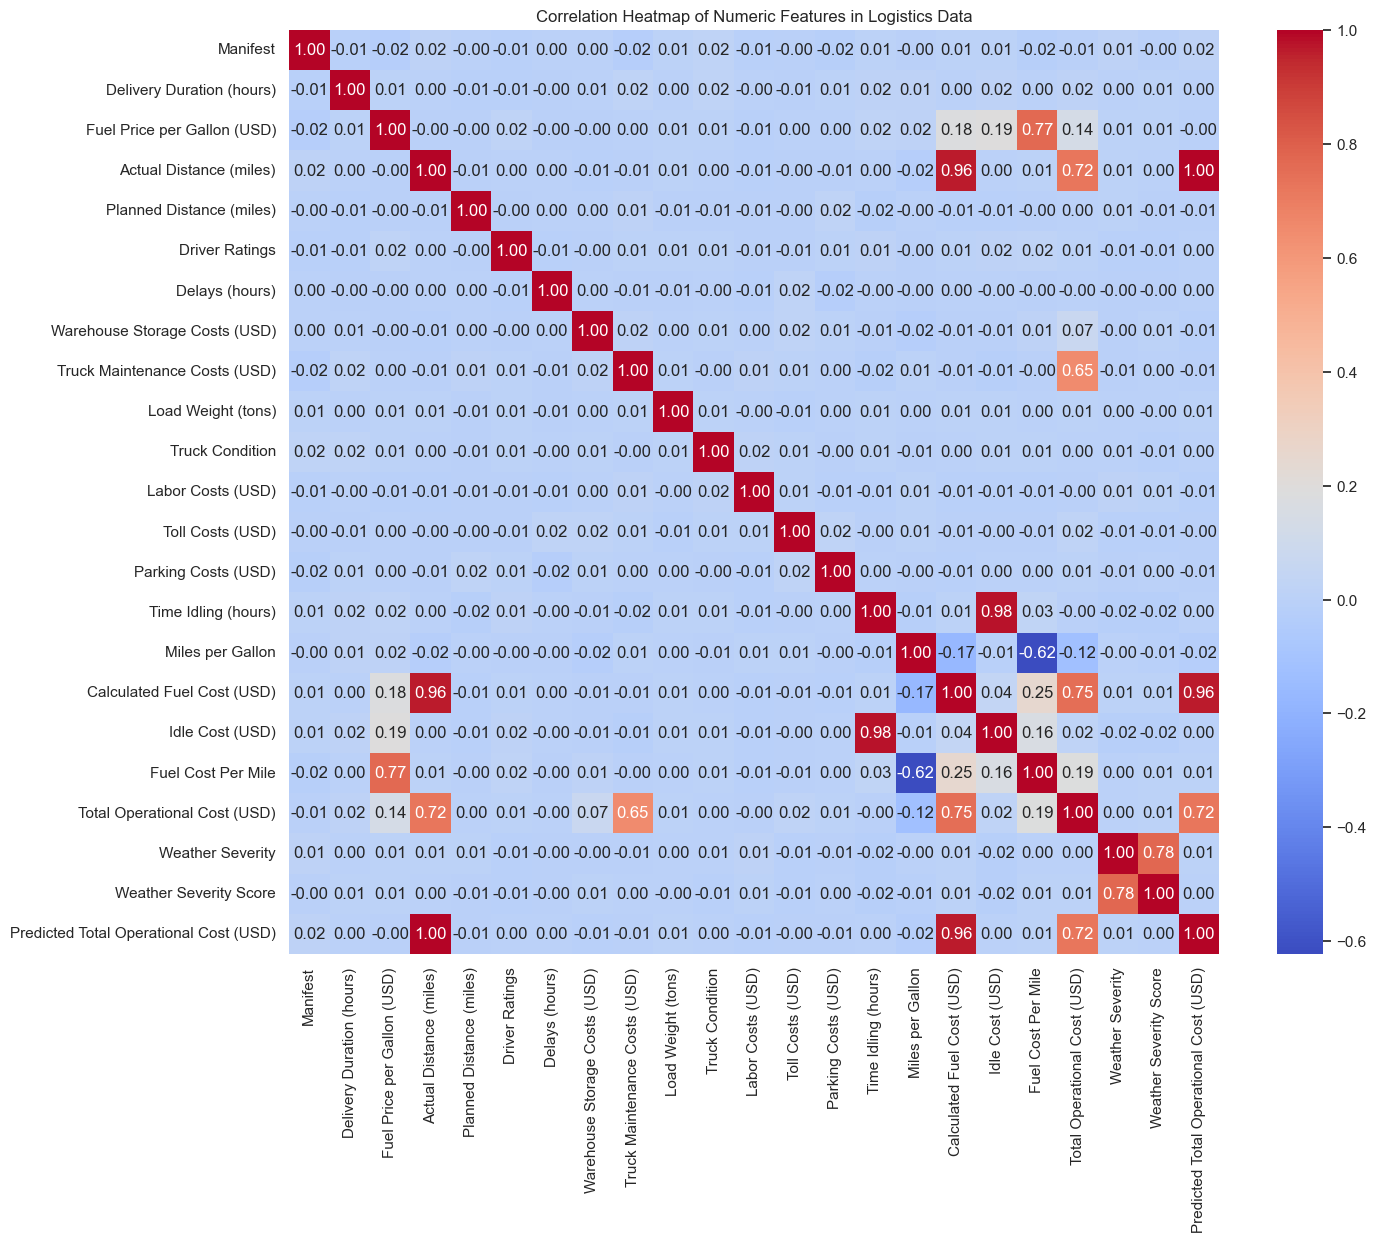

In [228]:
# Filter for numeric columns only
numeric_df = logistics_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix on numeric data
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features in Logistics Data")
plt.show()

Box Plot by Group

Purpose: Shows the distribution of a variable grouped by a categorical variable.


/var/folders/s_/bdr4_2yj4_z0cz37bq2yrzxh0000gn/T/ipykernel_40700/2574611607.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Traffic Conditions', y='Delivery Duration (hours)', data=df, palette="Set2")


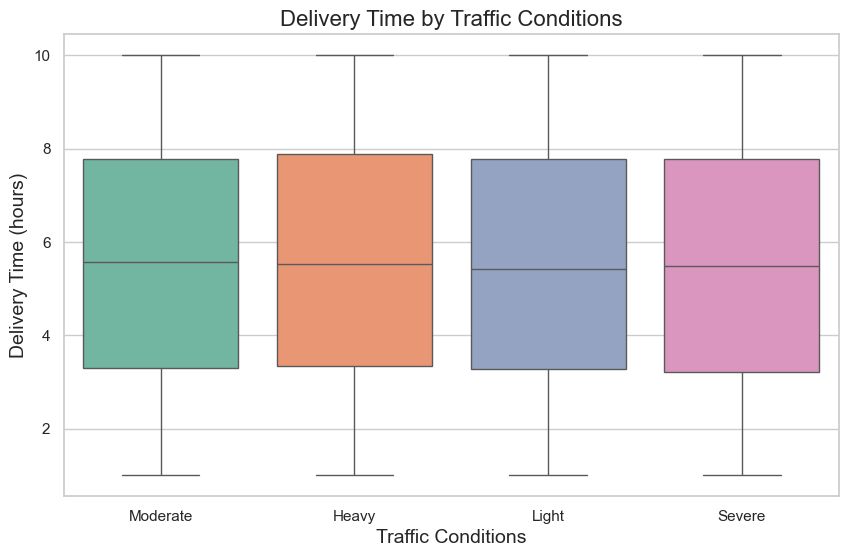

In [229]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Traffic Conditions', y='Delivery Duration (hours)', data=df, palette="Set2")
plt.title("Delivery Time by Traffic Conditions", fontsize=16)
plt.xlabel("Traffic Conditions", fontsize=14)
plt.ylabel("Delivery Time (hours)", fontsize=14)
plt.show()

EDA Part 2: Categorical Analysis and Visualizations

Count Plots for Categorical Variables:

For variables like Route Type, Truck Type, and Driver Experience,  count plots to show the distribution across categories.

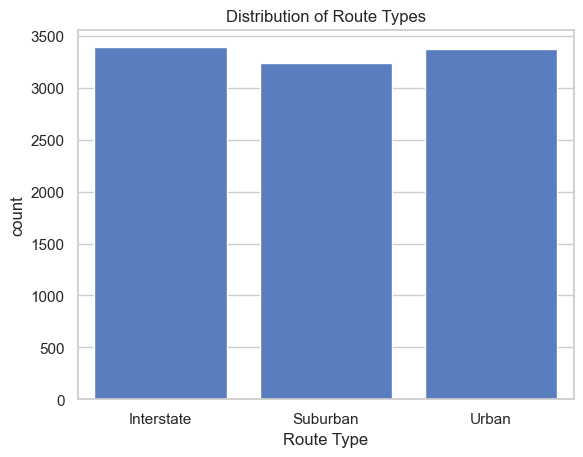

In [230]:
# Count plot for Route Type
sns.countplot(data=logistics_df, x='Route Type')
plt.title("Distribution of Route Types")
plt.show()

This line plot will show trends over time, helping identify any patterns in costs by traffic condition and allowing for better planning.

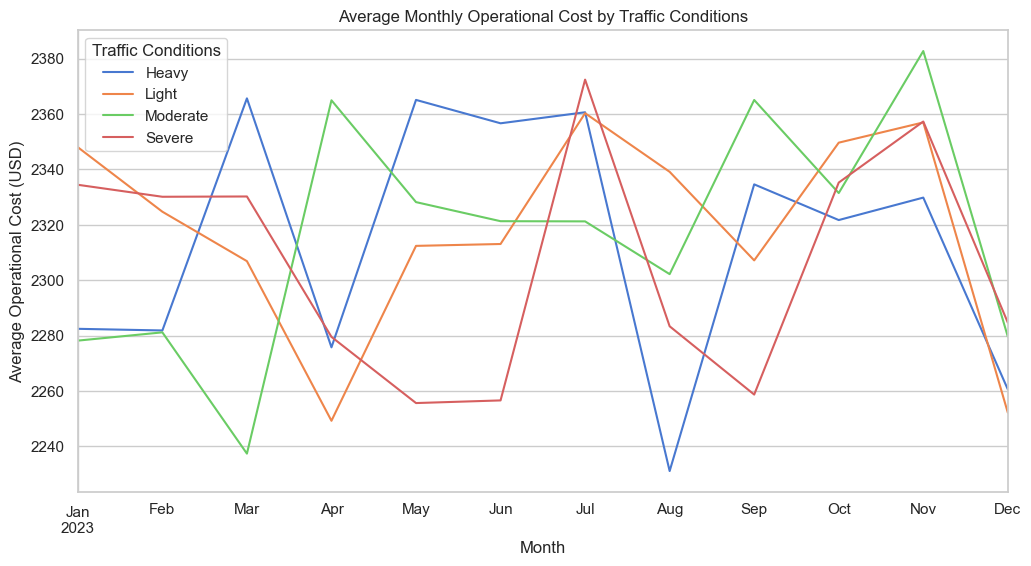

In [231]:
# Convert Date to datetime format if it isn't already
logistics_df['Date'] = pd.to_datetime(logistics_df['Date'])

# Aggregate by month and traffic conditions
monthly_data = logistics_df.groupby([logistics_df['Date'].dt.to_period("M"), 'Traffic Conditions'])['Total Operational Cost (USD)'].mean().unstack()

# Plot monthly average operational cost by traffic conditions
monthly_data.plot(kind='line', figsize=(12, 6))
plt.title("Average Monthly Operational Cost by Traffic Conditions")
plt.xlabel("Month")
plt.ylabel("Average Operational Cost (USD)")
plt.legend(title="Traffic Conditions")
plt.show()

Seasonal Analysis by Traffic Conditions

To visualize seasonal variations, I will categorize data by season and plot operational costs.

This stacked bar chart allows for easy comparison of costs by season and traffic conditions, highlighting high-cost periods.

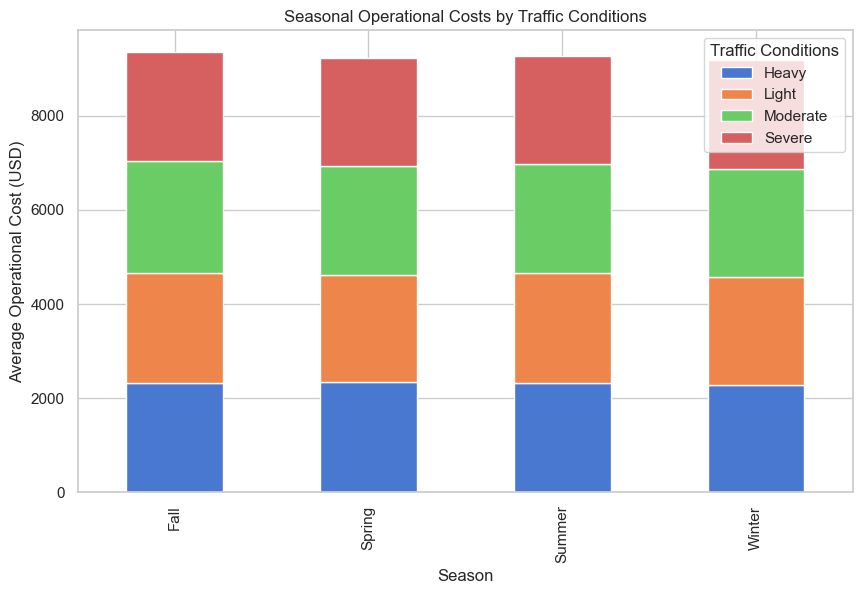

In [232]:
# Map months to seasons
season_map = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
              7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
logistics_df['Season'] = logistics_df['Date'].dt.month.map(season_map)

# Aggregate by season and traffic conditions
seasonal_data = logistics_df.groupby(['Season', 'Traffic Conditions'])['Total Operational Cost (USD)'].mean().unstack()

# Plot seasonal operational costs by traffic conditions
seasonal_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Seasonal Operational Costs by Traffic Conditions")
plt.xlabel("Season")
plt.ylabel("Average Operational Cost (USD)")
plt.legend(title="Traffic Conditions")
plt.show()

---

## Time Series Visualizations (For Time-Dependent Data)

---

Line Plot

Purpose: Common for time series data to track changes over time.

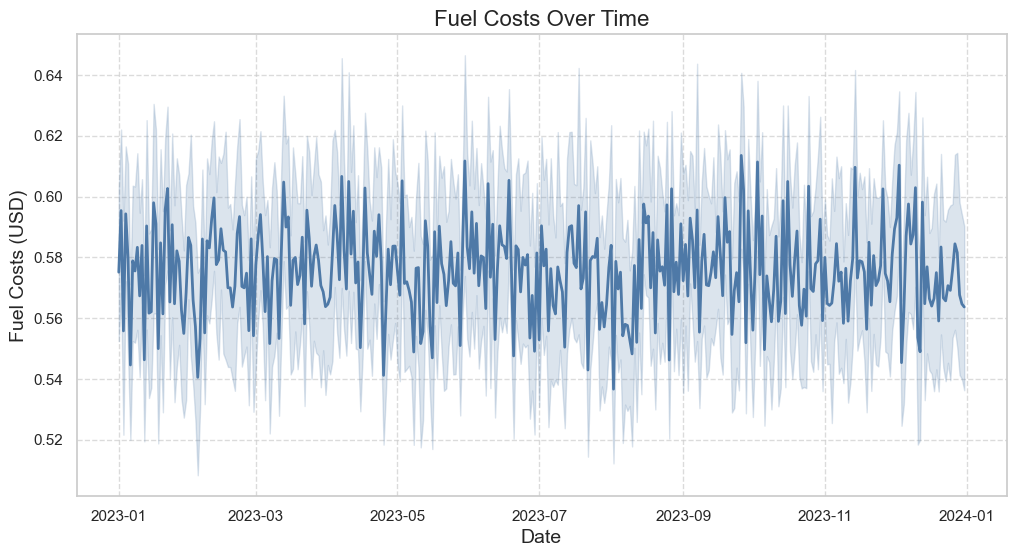

In [233]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Fuel Cost Per Mile', data=df, color="#4e79a7", linewidth=2)
plt.title("Fuel Costs Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Fuel Costs (USD)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Seasonal Decomposition

Purpose: Decomposes time series data into trend, seasonality, and residuals.

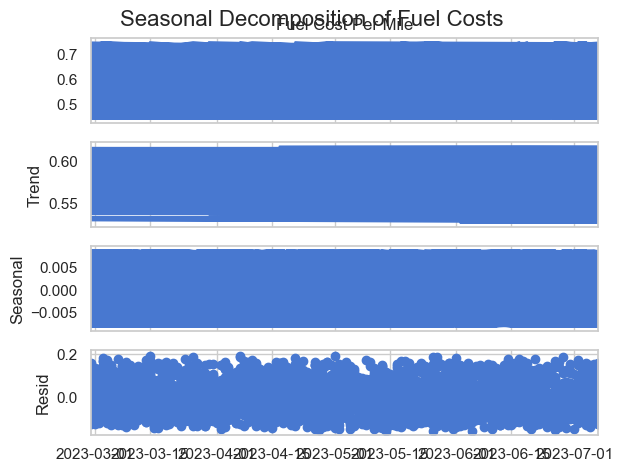

In [234]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'Date' column is the index in your DataFrame
df.set_index('Date', inplace=True)
result = seasonal_decompose(df['Fuel Cost Per Mile'], model='additive', period=30)
result.plot()
plt.suptitle("Seasonal Decomposition of Fuel Costs", fontsize=16)
plt.show()

---

## Distribution and Anomaly Detection

---

Violin Plot

Purpose: Combines box plot and KDE plot, useful for visualizing distributions.

/var/folders/s_/bdr4_2yj4_z0cz37bq2yrzxh0000gn/T/ipykernel_40700/2006656843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Traffic Conditions', y='Fuel Cost Per Mile', data=df, palette="Set2", inner="quartile")


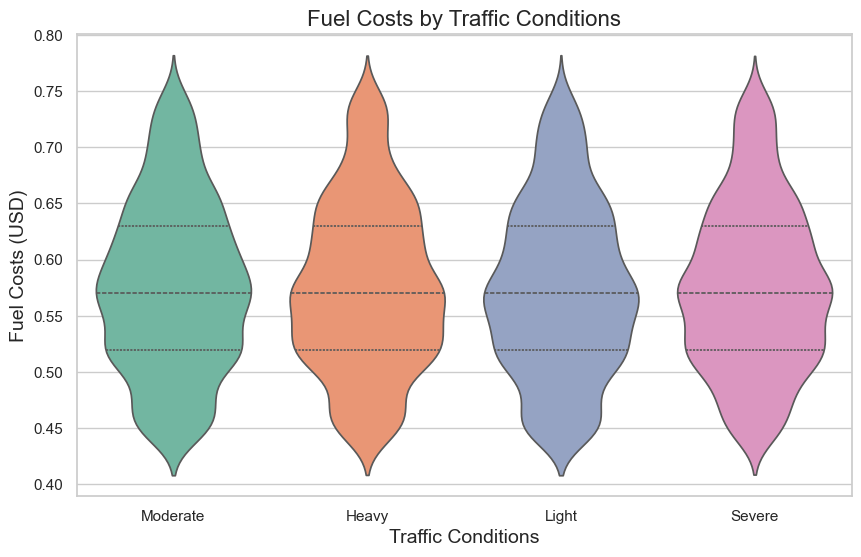

In [235]:

plt.figure(figsize=(10, 6))
sns.violinplot(x='Traffic Conditions', y='Fuel Cost Per Mile', data=df, palette="Set2", inner="quartile")
plt.title("Fuel Costs by Traffic Conditions", fontsize=16)
plt.xlabel("Traffic Conditions", fontsize=14)
plt.ylabel("Fuel Costs (USD)", fontsize=14)
plt.show()

Z-score / IQR for Outlier Detection

Purpose: Identify and visualize outliers in numerical data.

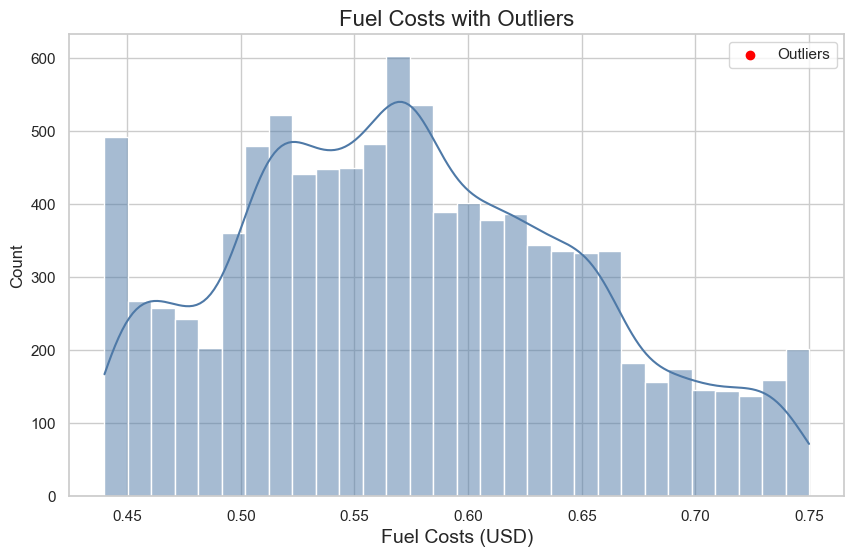

In [236]:
from scipy import stats

# Z-score method
df['z_score'] = stats.zscore(df['Fuel Cost Per Mile'])
outliers = df[df['z_score'].abs() > 3]

plt.figure(figsize=(10, 6))
sns.histplot(df['Fuel Cost Per Mile'], bins=30, kde=True, color="#4e79a7")
plt.scatter(outliers['Fuel Cost Per Mile'], [0]*len(outliers), color='red', label='Outliers')
plt.title("Fuel Costs with Outliers", fontsize=16)
plt.xlabel("Fuel Costs (USD)", fontsize=14)
plt.legend()
plt.show()

Missing Value Heatmap

Purpose: Visualizes missing data across features.

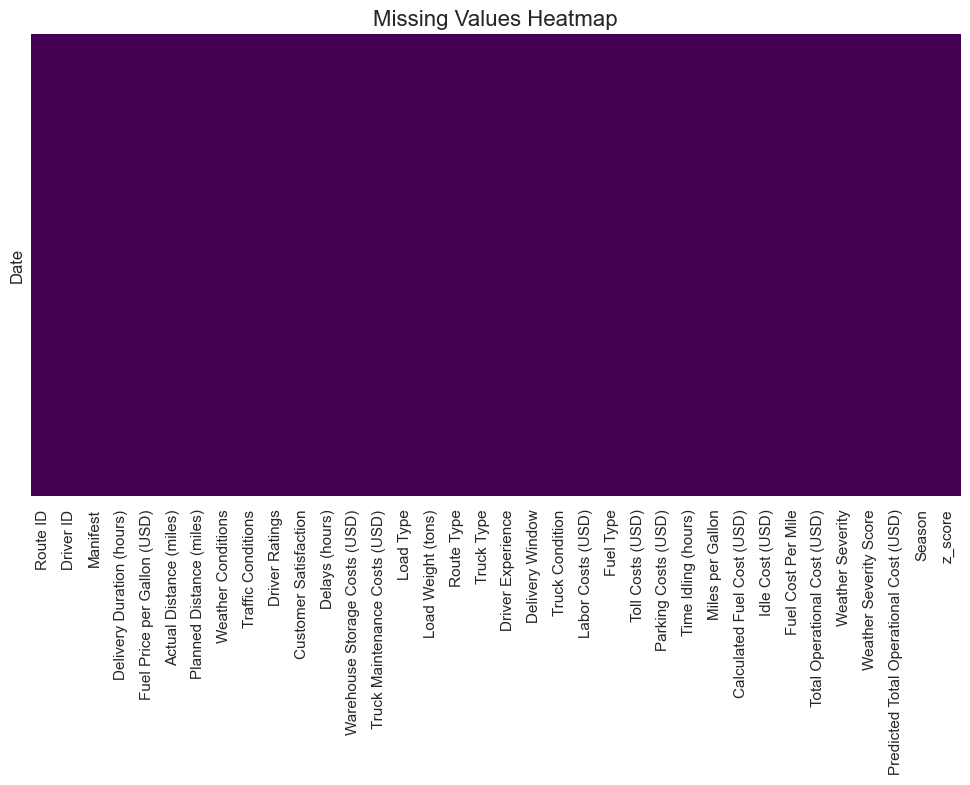

In [237]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap", fontsize=16)
plt.show()

---

# Clustering 

---

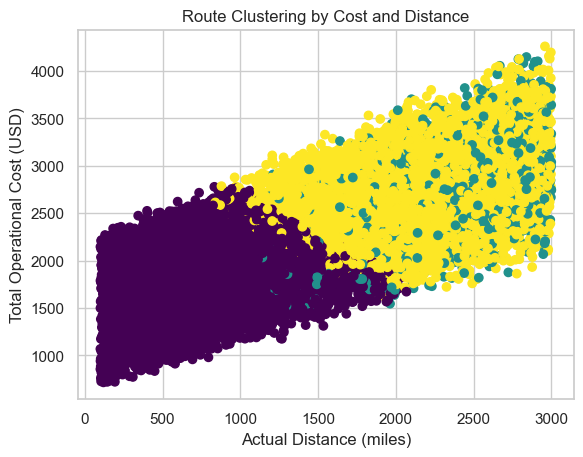

In [239]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
logistics_engineered_df = pd.read_csv('../data/processed/engineered_data.csv')
# Standardize features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(logistics_engineered_df[['Actual Distance (miles)', 'Total Operational Cost (USD)', 'Delivery Efficiency']])

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
logistics_engineered_df['Route Cluster'] = kmeans.fit_predict(scaled_features)

# Plot clusters
plt.scatter(logistics_engineered_df['Actual Distance (miles)'], logistics_engineered_df['Total Operational Cost (USD)'], 
            c=logistics_engineered_df['Route Cluster'], cmap='viridis')
plt.xlabel('Actual Distance (miles)')
plt.ylabel('Total Operational Cost (USD)')
plt.title('Route Clustering by Cost and Distance')
plt.show()

K-Means Clustering

K-Means clustering identifies patterns, such as types of routes based on distance and delivery time. The cluster labels can later be used as features in modeling.


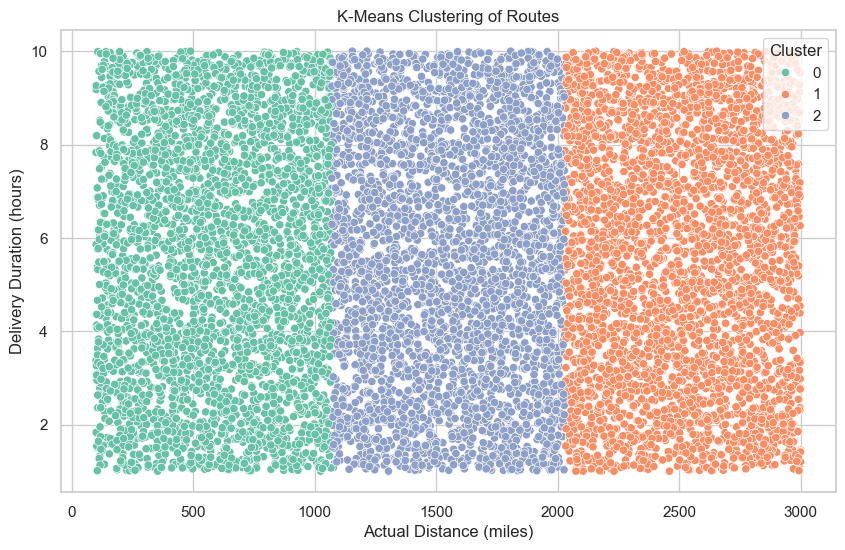

In [240]:
from sklearn.cluster import KMeans
import numpy as np

# Select features for clustering
features = df[['Actual Distance (miles)', 'Delivery Duration (hours)']]

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Distance (miles)', y='Delivery Duration (hours)', hue='Cluster', data=df, palette="Set2")
plt.title("K-Means Clustering of Routes")
plt.show()

DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

Purpose: Finds clusters based on the density of data points, useful for irregularly shaped clusters.

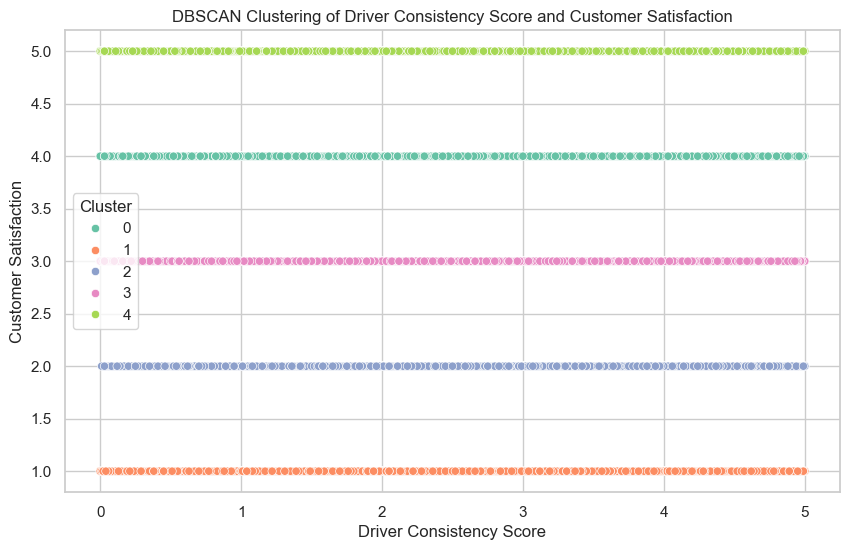

In [241]:
from sklearn.cluster import DBSCAN
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
logistics_engineered_df['cluster'] = dbscan.fit_predict(logistics_engineered_df[['Driver Consistency Score', 'Customer Satisfaction']])

# Scatter plot with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Driver Consistency Score', y='Customer Satisfaction', hue='cluster', data=logistics_engineered_df, palette="Set2")
plt.title("DBSCAN Clustering of Driver Consistency Score and Customer Satisfaction")
plt.xlabel("Driver Consistency Score")
plt.ylabel("Customer Satisfaction")
plt.legend(title="Cluster")
plt.show()

Hierarchical Clustering

Purpose: Builds a hierarchy of clusters that can be visualized using a dendrogram.

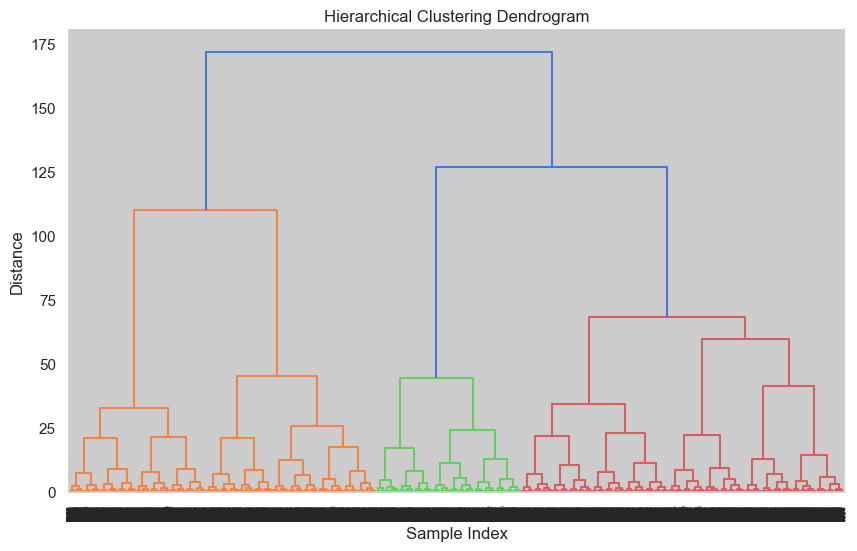

In [242]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Ensure the DataFrame has the columns
# Example using 'Driver Consistency Score' and 'Customer Satisfaction' for hierarchical clustering
data = logistics_engineered_df[['Driver Consistency Score', 'Customer Satisfaction']]
# Create the linkage matrix
linkage_matrix = linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

---

Data Selection: data = df[['Driver Consistency Score', 'Customer Satisfaction']] extracts the relevant columns as a 2D array.

Linkage Matrix: linkage(data, method='ward') performs hierarchical clustering on the selected data.

Dendrogram: dendrogram(linkage_matrix) generates the dendrogram plot to visualize the clustering.

---

t-SNE and PCA for Dimensionality Reduction (Often used in conjunction with clustering)

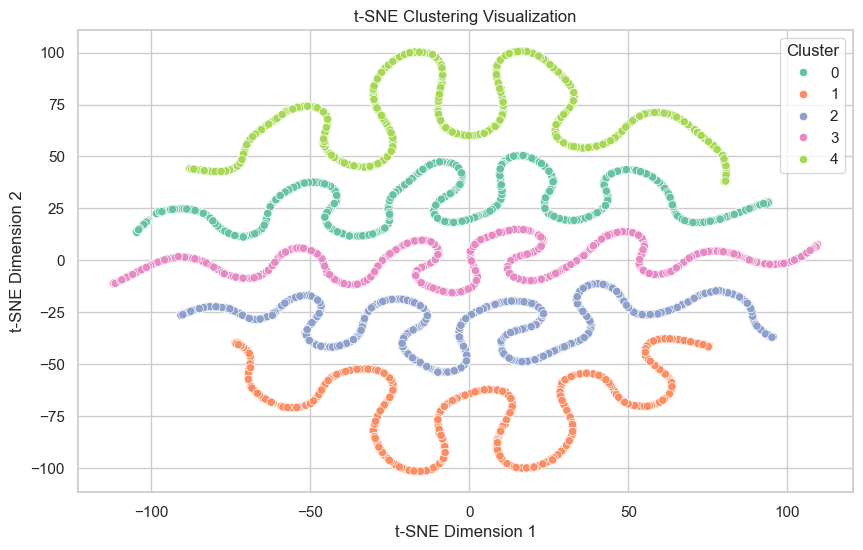

In [243]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(logistics_engineered_df[['Driver Consistency Score', 'Customer Satisfaction']])

# Add t-SNE results to the DataFrame
logistics_engineered_df['tsne-2d-one'] = tsne_results[:, 0]
logistics_engineered_df['tsne-2d-two'] = tsne_results[:, 1]

# Scatter plot for t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='cluster', data=logistics_engineered_df, palette="Set2")
plt.title("t-SNE Clustering Visualization")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster")
plt.show()